In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\Data_h\heart.csv")
data.drop_duplicates(inplace=True)
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [4]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [5]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [7]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/10


6/6 [==============================] - 1s 39ms/step - loss: 0.7137 - accuracy: 0.5208 - val_loss: 0.6394 - val_accuracy: 0.8367
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6556 - accuracy: 0.6354 - val_loss: 0.6045 - val_accuracy: 0.8163
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6103 - accuracy: 0.7448 - val_loss: 0.5576 - val_accuracy: 0.8367
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 0.5687 - accuracy: 0.7865 - val_loss: 0.5027 - val_accuracy: 0.8367
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.5110 - accuracy: 0.8073 - val_loss: 0.4393 - val_accuracy: 0.8571
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: 0.4841 - accuracy: 0.8177 - val_loss: 0.3848 - val_accuracy: 0.8571
Epoch 7/10
6/6 [==============================] - 0s 8ms/step - loss: 0.4394 - accuracy: 0.8125 - val_loss: 0.3413 - val_accuracy: 0.8571
Epoch 8/10
6/6 [===============

In [8]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 3ms/step - loss: 0.3744 - accuracy: 0.8361
Test Accuracy: 0.8361


In [9]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

2/2 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.93      0.78      0.85        36

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.83        61
weighted avg       0.85      0.84      0.84        61

Confusion Matrix:
 [[23  2]
 [ 8 28]]


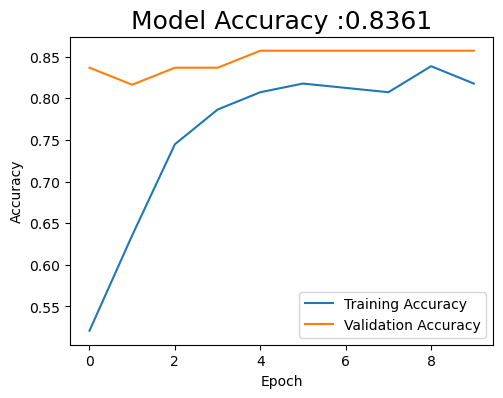

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Model Accuracy :{accuracy:.4f}',fontsize=18)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

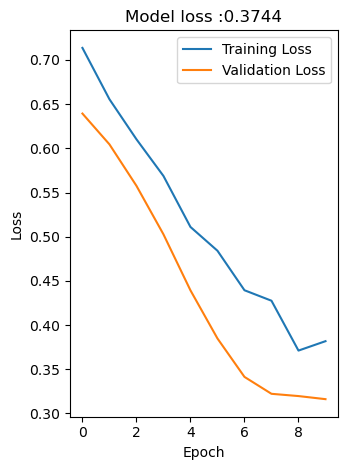

In [11]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Model loss :{loss:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

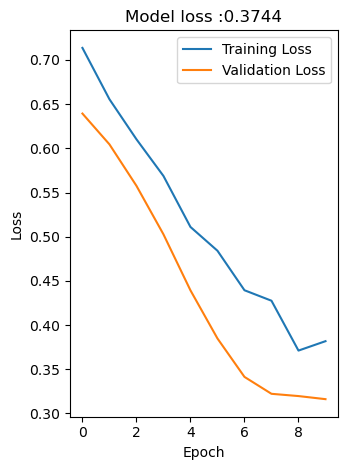

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


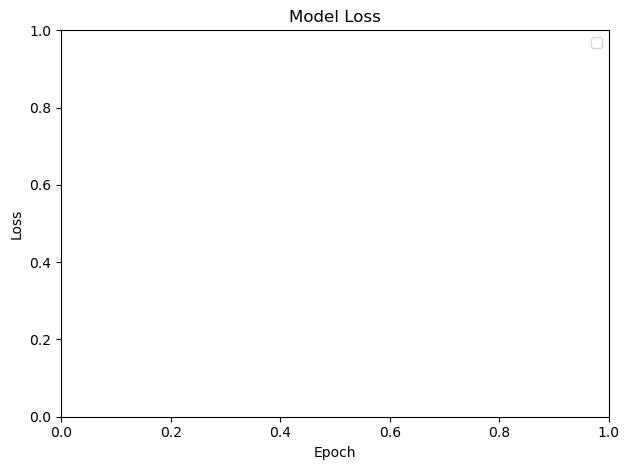

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Model loss :{loss:.4f}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()